# Avaliando algoritmos de aprendizagem

***

In [129]:
pip install ucimlrepo

## Importando bibliotecas

In [130]:
#IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV

#Acesso ao dataset
from ucimlrepo import fetch_ucirepo

from sklearn.tree import DecisionTreeClassifier,  plot_tree

from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             RocCurveDisplay,
                             roc_curve, roc_auc_score,
                             auc, accuracy_score)

import warnings
warnings.filterwarnings('ignore')

### Breast Cancer Wisconsin (Diagnostic)

[Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [131]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

seed=42

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

dataset = pd.concat([X,y], axis=1)
dataset

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [132]:
print(f"Tamanho do dataset: {dataset.shape}\n")
dataset.head()

Tamanho do dataset: (569, 31)



,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [133]:
#Mapeando os valores da classe para inteiro (para fins de visualização)
#dataset["diagnosis"] = pd.factorize(dataset["Diagnosis"])[0]
# M = 0
# B = 1

# Seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"Diagnosis"]

X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Matriz de Confusão
Quantifica os erros e acertos do seu modelo:

- VP: classificação correta da classe Positivo;
- FN (Erro Tipo II): erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
- FP (Erro Tipo I): erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo;
- VN: classificação correta da classe Negativo.

<a href="https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c">
  <img src="https://miro.medium.com/v2/resize:fit:938/1*s7VB26Cfo1LdVZcLou-e0g.png" alt="Matriz de Confusão" width="600"/>
</a>

## Métricas

Existem várias formas de avaliar um modelo de aprendizagem, dependendo da tarefa que o modelo irá realizar.

Classificação:
- [ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html): Mede o trade-off entre a taxa de falsos positivos (FP / FP+VN) e a taxa de verdadeiros positivos (VP / VP+FN). Quanto maior a área abaixo da curva, melhor o classificador.
- [Acurácia](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score): Calcula a razão das predições corretas.
- [Precisão](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics): Mede a capacidade do classificador de não classificar uma instância positiva como negativa. (VP / VP+FP)
- [Recall](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics) (Revocação/Sensibilidade): Mede a capacidade do classificador de encontrar todas as instâncias positivas. (VP / VP+FN)
- [Score F1](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics): É a média harmônica entre precisão e revocação. Caso você não tenha um objetivo concreto que dê prioridade a precisão ou revocação, F1 é uma boa forma de avaliação.

Regressão:
- [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score): O coeficiente de determinação quantifica o ajuste do modelo aos dados.
- [MSE](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): Mede o erro quadrático médio entre as previsões do classificador e o dataset.

In [134]:
# dividir classificador em treino e teste
# Random_state: Usar um valor inteiro produzirá os mesmos resultados em diferentes chamadas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

model = DecisionTreeClassifier(random_state=42)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



### Matriz de confusão

[[101   7]
 [  3  60]]

 Labels:['B' 'M'] 



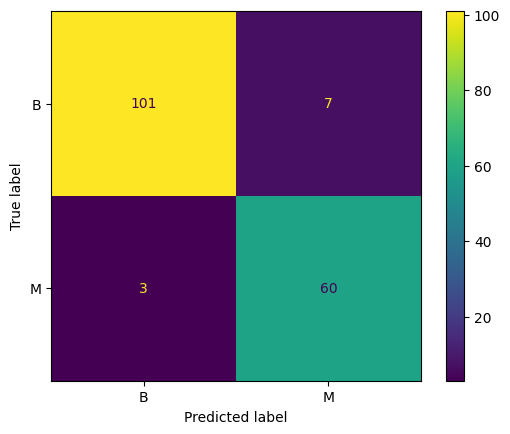

In [135]:
# a função confusion matrix retorna uma matriz com a contagem de como cada
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp_cm.plot()

### ROC Curve

AUC-ROC: 0.9437830687830688


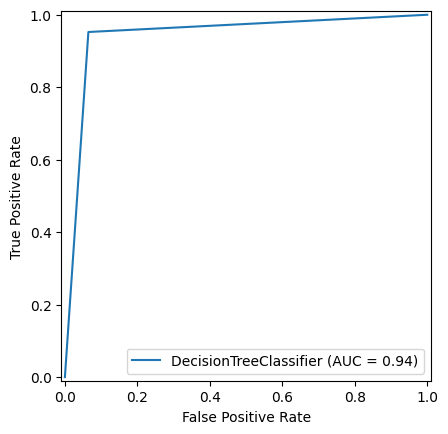

In [136]:
# Use predict_proba for ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class ('M' which is now 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label="M")
#Área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)
disp_roc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name=model.__class__.__name__)
disp_roc_curve.plot()

print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

## Validação cruzada

### HOLD-OUT

Uma pequena fração do dataset é separada para teste e outra para treino. A fração de treino pode ser dividida subsequentemente em quaisquer outros subconjuntos, o importante é garantir que o dataset de teste não é utilizado durante treino, otimização ou concepção do modelo.

In [137]:
def test_model(X_train, X_test, y_train, y_test, model_class=DecisionTreeClassifier):
    model = model_class(random_state=199)
    model.fit(X_train, y_train)

    #predição
    y_pred = model.predict(X_test)

    return accuracy_score(y_test,y_pred)

Um simples hold-out depende bastante da seleção inicial.

In [138]:
#random_state deve estar entre 0 e 2**32 - 1
random_state = 199
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

random_state = 200
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

random_state = 201
print("\n Random state: %d" % random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))

#Aleatório
print("\n Aleatório")
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f" Acurácia: %.3f" % (test_model(X_train, X_test, y_train, y_test)))


 Random state: 199
 Acurácia: 0.916

 Random state: 200
 Acurácia: 0.937

 Random state: 201
 Acurácia: 0.937

 Aleatório
 Acurácia: 0.930


Podemos adicionar repetição e realizar vários hold-outs para avaliar várias vezes a performance de um algoritmo.

In [139]:
def hold_out():
    accuracies_list = []
    best_accuracy = 0
    best_round = 1

    for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199 + i)
        accuracy = test_model(X_train, X_test, y_train, y_test)
        accuracies_list.append(accuracy)

        # Atualizar a melhor acurácia e rodada
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_round = i

    accuracies = np.array(accuracies_list)
    print("Min: %.3f Max: %.3f" % (accuracies.min(), accuracies.max()))
    print("Hold-out: %.3f +- (%.3f)" % (accuracies.mean(), accuracies.std()))
    print("Melhor rodada: %d com acurácia de %.3f" % (best_round, best_accuracy))

hold_out()

Min: 0.888 Max: 0.951
Hold-out: 0.921 +- (0.021)
Melhor rodada: 4 com acurácia de 0.951


Outro parâmetro importante na função _train_test_split_ é o _stratify_. Ele controla se a proporção das classes no dataset de treino e teste deve ser mantida e tenta selecionar as instâncias que estão faltando para se aproximar da distribuição original.

In [140]:
def print_distribution(arr):
    arr = np.unique(arr, return_counts=True)[1] / arr.count()
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))
_, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=199)
_, _, y_train_strat, _ = train_test_split(X, y, test_size=0.3, random_state=199, stratify=y)

print("Proporções por classe no dataset em geral:")
print_distribution(y)

print("Proporções por classe no dataset de treino sem estratificação:")
print_distribution(y_train)

print("Proporções por classe no dataset de treino com estratificação:")
print_distribution(y_train_strat)

Proporções por classe no dataset em geral:
Classe 0: 62.74%
Classe 1: 37.26%
Proporções por classe no dataset de treino sem estratificação:
Classe 0: 65.08%
Classe 1: 34.92%
Proporções por classe no dataset de treino com estratificação:
Classe 0: 62.81%
Classe 1: 37.19%


Na estratificação,a divisão de dados preserva a distribuição original das classes tanto no conjunto de treino quanto no de teste.

### LEAVE-ONE-OUT

Fornece índices de treinamento/teste para dividir os dados em conjuntos de treinamento/teste.

Cada amostra é usada uma vez como um conjunto de teste (singleton) enquanto as amostras restantes formam o conjunto de treinamento. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

In [141]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()

model = DecisionTreeClassifier(random_state=199)

scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

print("Leave-One-Out: %.3f ± %.3f" % (scores.mean(), scores.std()))

Leave-One-Out: 0.924 ± 0.264


### K-FOLD

Fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste.

Divide o conjunto de dados em k folds consecutivos (sem embaralhar "***shuffle***" por padrão)

In [142]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

model = DecisionTreeClassifier(random_state=199)

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("K-fold: %.3f ± %.3f" % (scores.mean(), scores.std()))

K-fold: 0.900 ± 0.032


In [143]:
def evaluate_model_with_kfold(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):

        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=199)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))

        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

In [144]:
# n_splits deve ser pelo menos 2
evaluate_model_with_kfold(KFold(n_splits=5))

Fold 0: 0.868
Fold 1: 0.904
Fold 2: 0.939
Fold 3: 0.930
Fold 4: 0.858

Acurácia média (desvio): 0.900 +- (0.032)


Observe que o _k-Fold_ cria as partições sequencialmente, o que pode interferir na distribuição das classes devido a alguma ordenação no dataset. Use o parâmetro _shuffle_ para controlar a permutação do dataset antes de realizar o particionamento. E como no _hold-out_, a subdivisão aleatórias com _k-Fold_ e _shuffle_ também interfere na distribuição das classes.

In [145]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)
print("\n")

kf = KFold(n_splits=5)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" % (fold))
    print_distribution(y[train])
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 62.74%
Classe 1: 37.26%


Fold 0
Classe 0: 68.35%
Classe 1: 31.65%
Fold 1
Classe 0: 64.18%
Classe 1: 35.82%
Fold 2
Classe 0: 62.20%
Classe 1: 37.80%
Fold 3
Classe 0: 59.78%
Classe 1: 40.22%
Fold 4
Classe 0: 59.21%
Classe 1: 40.79%


In [146]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)
print("\n")

kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" % (fold))
    print_distribution(y[train])
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 62.74%
Classe 1: 37.26%


Fold 0
Classe 0: 62.42%
Classe 1: 37.58%
Fold 1
Classe 0: 63.08%
Classe 1: 36.92%
Fold 2
Classe 0: 63.52%
Classe 1: 36.48%
Fold 3
Classe 0: 61.76%
Classe 1: 38.24%
Fold 4
Classe 0: 62.94%
Classe 1: 37.06%


Para resolver isso, _StratifiedKFold_ realiza a estratificação das classes. Outras formas de seleção estão disponíveis [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [147]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)
print("\n")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train])
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 62.74%
Classe 1: 37.26%


Fold 0
Classe 0: 62.86%
Classe 1: 37.14%
Fold 1
Classe 0: 62.86%
Classe 1: 37.14%
Fold 2
Classe 0: 62.64%
Classe 1: 37.36%
Fold 3
Classe 0: 62.64%
Classe 1: 37.36%
Fold 4
Classe 0: 62.72%
Classe 1: 37.28%


In [148]:
evaluate_model_with_kfold(StratifiedKFold(n_splits=5, shuffle=True, random_state=199))

Fold 0: 0.939
Fold 1: 0.947
Fold 2: 0.912
Fold 3: 0.868
Fold 4: 0.938

Acurácia média (desvio): 0.921 +- (0.029)
